In [68]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns


# importowanie csv do ramki danych
#students = pd.read_csv('student-mat.csv')
students.head(50)

,age,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,2,2,0,1,0,0,0,1,1,...,4,3,4,1,1,3,6,5,6,6
1,17,1,2,0,0,1,0,0,0,1,...,5,3,3,1,1,3,4,5,5,6
2,15,1,2,3,1,0,1,0,1,1,...,4,3,2,2,3,3,10,7,8,10
3,15,1,3,0,0,1,1,1,1,1,...,3,2,2,1,1,5,2,15,14,15
4,16,1,2,0,0,1,1,0,1,1,...,4,3,2,1,2,5,4,6,10,10
5,16,1,2,0,0,1,1,1,1,1,...,5,4,2,1,2,5,10,15,15,15
6,16,1,2,0,0,0,0,0,1,1,...,4,4,4,1,1,3,0,12,12,11
7,17,2,2,0,1,1,0,0,1,1,...,4,1,4,1,1,1,6,6,5,6
8,15,1,2,0,0,1,1,0,1,1,...,4,2,2,1,1,1,0,16,18,19
9,15,1,2,0,0,1,1,1,1,1,...,5,5,1,1,1,5,0,14,15,15


In [70]:
# analiza danych statystycznych
print(students.describe())
print(students.info())
print(students.isnull().values.any())

students

              age  traveltime   studytime    failures   schoolsup      famsup  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    1.448101    2.035443    0.334177    0.129114    0.612658   
std      1.276043    0.697505    0.839240    0.743651    0.335751    0.487761   
min     15.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%     16.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
50%     17.000000    1.000000    2.000000    0.000000    0.000000    1.000000   
75%     18.000000    2.000000    2.000000    0.000000    0.000000    1.000000   
max     22.000000    4.000000    4.000000    3.000000    1.000000    1.000000   

             paid  activities     nursery      higher  ...      famrel  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     0.458228    0.508861    0.794937    0.949367  ...    3.944304   
std      0.498884    0.500555    0.404260    0.2

,age,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,2,2,0,1,0,0,0,1,1,...,4,3,4,1,1,3,6,5,6,6
1,17,1,2,0,0,1,0,0,0,1,...,5,3,3,1,1,3,4,5,5,6
2,15,1,2,3,1,0,1,0,1,1,...,4,3,2,2,3,3,10,7,8,10
3,15,1,3,0,0,1,1,1,1,1,...,3,2,2,1,1,5,2,15,14,15
4,16,1,2,0,0,1,1,0,1,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,2,2,0,1,1,0,1,1,...,5,5,4,4,5,4,11,9,9,9
391,17,2,1,0,0,0,0,0,0,1,...,2,4,5,3,4,2,3,14,16,16
392,21,1,1,3,0,0,0,0,0,1,...,5,5,3,3,3,3,3,10,8,7
393,18,3,1,0,0,0,0,0,0,1,...,4,4,1,3,4,5,0,11,12,10


In [40]:

print(students.head(15))

    GP  MS  F  M  age  traveltime  studytime  failures schoolsup famsup  ...  \
0    1   0  1  0   18           2          2         0       yes     no  ...   
1    1   0  1  0   17           1          2         0        no    yes  ...   
2    1   0  1  0   15           1          2         3       yes     no  ...   
3    1   0  1  0   15           1          3         0        no    yes  ...   
4    1   0  1  0   16           1          2         0        no    yes  ...   
5    1   0  0  1   16           1          2         0        no    yes  ...   
6    1   0  0  1   16           1          2         0        no     no  ...   
7    1   0  1  0   17           2          2         0       yes    yes  ...   
8    1   0  0  1   15           1          2         0        no    yes  ...   
9    1   0  0  1   15           1          2         0        no    yes  ...   
10   1   0  1  0   15           1          2         0        no    yes  ...   
11   1   0  1  0   15           3       

In [43]:
# Usunięcie niepotyrzebnych danych
del students['address']
del students['famsize']
del students['Pstatus']
del students['Medu']
del students['Fedu']
del students['Mjob']
del students['Fjob']
del students['reason']
del students['guardian']
del students['school']
del students['sex']

print(students.head())

   age  traveltime  studytime  failures schoolsup famsup paid activities  \
0   18           2          2         0       yes     no   no         no   
1   17           1          2         0        no    yes   no         no   
2   15           1          2         3       yes     no  yes         no   
3   15           1          3         0        no    yes  yes        yes   
4   16           1          2         0        no    yes  yes         no   

  nursery higher  ... famrel freetime  goout  Dalc  Walc  health  absences  \
0     yes    yes  ...      4        3      4     1     1       3         6   
1      no    yes  ...      5        3      3     1     1       3         4   
2     yes    yes  ...      4        3      2     2     3       3        10   
3     yes    yes  ...      3        2      2     1     1       5         2   
4     yes    yes  ...      4        3      2     1     2       5         4   

   G1  G2  G3  
0   5   6   6  
1   5   5   6  
2   7   8  10  
3  15  14 

In [56]:
maps = {
	'no': 0,
	'yes': 1
}
# students['schoolsup'] = students['schoolsup'].apply(lambda x: maps[x])
students['famsup'] = students['famsup'].apply(lambda x: maps[x])
students['paid'] = students['paid'].apply(lambda x: maps[x])
students['activities'] = students['activities'].apply(lambda x: maps[x])
students['nursery'] = students['nursery'].apply(lambda x: maps[x])
students['higher'] = students['higher'].apply(lambda x: maps[x])
students['internet'] = students['internet'].apply(lambda x: maps[x])
students['romantic'] = students['romantic'].apply(lambda x: maps[x])


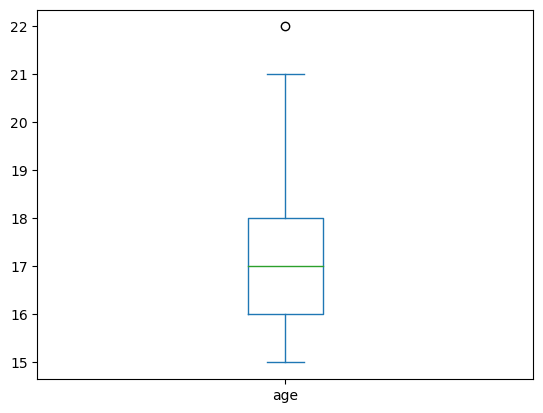

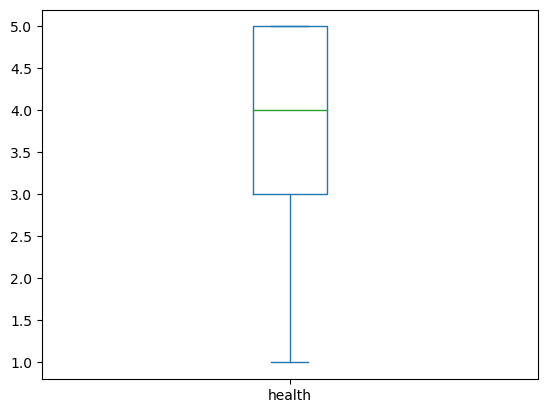

In [62]:
students['age'].plot(kind='box')
plt.show()
students['health'].plot(kind='box')
plt.show()

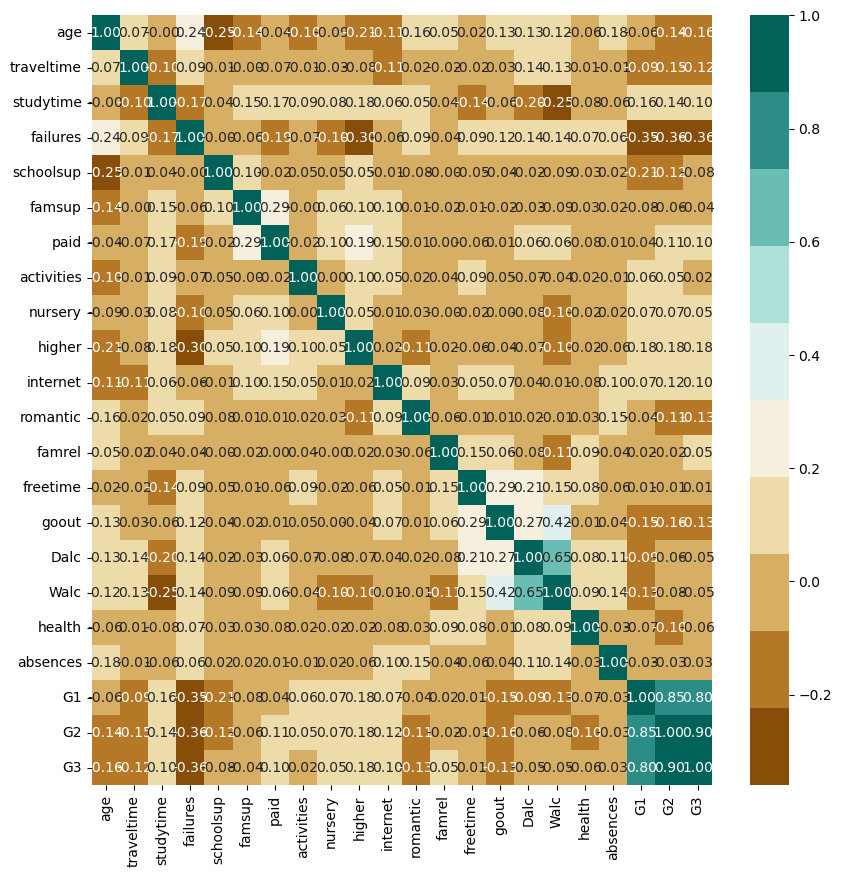

In [71]:
# wyznaczenie macierzy korelacji

correlations = students.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [74]:
# zbiór danych
X = students.drop('price', axis=1).to_numpy()
X

array([[ 2.       , 50.0492242, 19.9703793, ...,  1.       ,  0.       ,
         0.       ],
       [ 3.       , 52.2497745, 21.1068857, ...,  0.       ,  0.       ,
         1.       ],
       [ 2.       , 50.0669642, 19.9200249, ...,  1.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       , 52.3973449, 16.9619394, ...,  0.       ,  1.       ,
         0.       ],
       [ 6.       , 50.0242313, 19.959569 , ...,  1.       ,  0.       ,
         0.       ],
       [ 2.       , 52.141039 , 21.0323214, ...,  0.       ,  0.       ,
         1.       ]])

In [75]:
# zbiór etykiet
y = students.loc[:, 'price'].to_numpy()
y

array([749000., 240548., 427000., ..., 430695., 359000., 604800.])

In [76]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [77]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    with open('titanic_classifier.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    score_vals = [
        metrics.mean_squared_error(predictions, y_test),
        metrics.mean_absolute_error(predictions, y_test)
    ]
    return score_vals

In [81]:
# MODEL 1 - regresja liniowa
accuracy = train_model(linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

LR:  [139728263262.0341, 162694.8630618479]
random forrest tree [57616862592.42822, 71711.72276372142]


<AxesSubplot:>

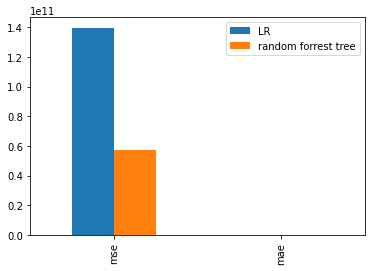

In [82]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['mse', 'mae'])
df_compare.plot(kind='bar')

In [85]:
# test manualny
regressor.predict([[2.0, 50.049224, 19.970379, 3.0, 74.05, 2021.0, 1, 0, 0]]) #prawidłowa wartość 749000.0

array([748500.])

In [86]:
# działania korygujące - hiperparametry

# MODEL 3 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

random forrest tree [56453332920.19657, 70981.75211458471]
